In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [7]:
dataframe = pd.read_csv('C:/Users/Saif/Downloads/MachineLearning/100_days_ml/data/titanicc.csv')

In [8]:
dataframe = dataframe.drop(columns=['boat', 'body', 'home.dest'])

In [9]:
print(f"There Are {dataframe.shape[0]} Columns and {dataframe.shape[1]} Rows")

There Are 1310 Columns and 11 Rows


In [10]:
print(f"Categorical Columns: {dataframe.select_dtypes(include='object').columns}")
print(f"Numerical Columns: {dataframe.select_dtypes(exclude='object').columns}")

Categorical Columns: Index(['name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')
Numerical Columns: Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


In [11]:
dataframe.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1022,3.0,0.0,"Mitkoff, Mr. Mito",male,NaN,0.0,0.0,349221,7.8958,NaN,S
342,2.0,1.0,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0.0,3.0,230136,39.0000,F4,S
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C
766,3.0,0.0,"Delalic, Mr. Redjo",male,25.0,0.0,0.0,349250,7.8958,NaN,S
849,3.0,0.0,"Hansen, Mr. Henrik Juul",male,26.0,1.0,0.0,350025,7.8542,NaN,S


#### Finding Null Values

In [12]:
dataframe.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age          264
sibsp          1
parch          1
ticket         1
fare           2
cabin       1015
embarked       3
dtype: int64

##### There are a lot of null values

In [13]:
# Lets Remove Null values because there is a value which is null in all columns

dataframe = dataframe[~dataframe.pclass.isnull()]

In [14]:
dataframe.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [15]:
dataframe[dataframe.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN


In [16]:
dataframe[dataframe.fare.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S


### Lets Start with Age missing values

<Axes: xlabel='age', ylabel='Count'>

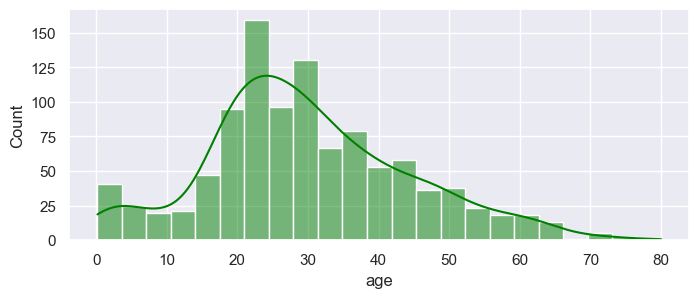

In [17]:
plt.figure(figsize=[8, 3])
sns.histplot(dataframe.age, kde=True, color='green')

##### It is almost like normal distribution

In [18]:
missing_values = np.linspace(dataframe.age.mean() - dataframe.age.std(), dataframe.age.mean() + dataframe.age.std(), 263).astype('int')

In [19]:
dataframe.age[dataframe.age.isnull()] = missing_values

In [20]:
dataframe.age = round(dataframe.age).astype('int')

<Axes: xlabel='age', ylabel='Count'>

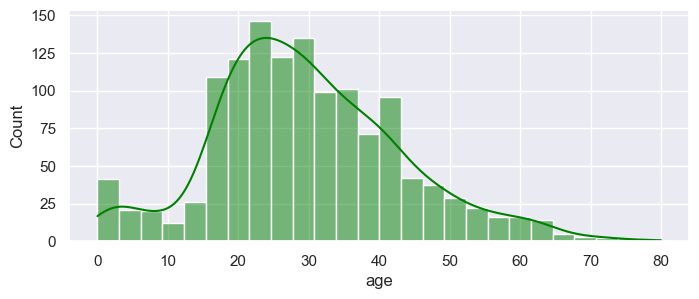

In [21]:
plt.figure(figsize=[8, 3])
sns.histplot(dataframe.age, kde=True, color='green')

In [22]:
dataframe.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

### now i imputed age missing values 

In [23]:
dataframe['age_category'] = dataframe.age.apply(lambda x: 'children' if (x <= 17) else 'youngster' if (x <= 30) else 'semi-old' if (x <= 50) else 'old')

### Lets remove fare missing values & embarked missing values because it is less than 1% missing values

In [24]:
dataframe = dataframe[~dataframe.embarked.isnull()]
dataframe = dataframe[~dataframe.fare.isnull()]

In [25]:
dataframe.isnull().sum()

pclass             0
survived           0
name               0
sex                0
age                0
sibsp              0
parch              0
ticket             0
fare               0
cabin           1013
embarked           0
age_category       0
dtype: int64

### lets deal with cabin missing values

In [26]:
dataframe.cabin = dataframe.cabin.apply(lambda x: 'Not Assigned' if pd.isnull(x) else x)

In [27]:
dataframe.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
age_category    0
dtype: int64

In [28]:
dataframe.sample(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_category
901,3.0,0.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,26,1.0,2.0,W./C. 6607,23.4500,Not Assigned,S,youngster
822,3.0,0.0,"Goldsmith, Mr. Nathan",male,41,0.0,0.0,SOTON/O.Q. 3101263,7.8500,Not Assigned,S,semi-old
1092,3.0,0.0,"Oreskovic, Mr. Luka",male,20,0.0,0.0,315094,8.6625,Not Assigned,S,youngster
1180,3.0,0.0,"Sage, Mrs. John (Annie Bullen)",female,39,1.0,9.0,CA. 2343,69.5500,Not Assigned,S,semi-old
678,3.0,0.0,"Boulos, Master. Akar",male,6,1.0,1.0,2678,15.2458,Not Assigned,C,children
159,1.0,1.0,"Hippach, Miss. Jean Gertrude",female,16,0.0,1.0,111361,57.9792,B18,C,children


### Here we can see that sibsp and parch are two columns but we can make it as one column total family

In [29]:
dataframe['total_family'] = dataframe.sibsp + dataframe.parch + 1

In [30]:
dataframe.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_category,total_family
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,B5,S,youngster,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,1,1.0,2.0,113781,151.5500,C22 C26,S,children,4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,C22 C26,S,children,4.0


### we can also make family size column like single, small, medium and large family

In [31]:
dataframe['family_size'] = dataframe.total_family.apply(lambda x: 'Single' if (x == 1) else 'Small' if (x <= 3) else 'Medium' if (x <= 5) else 'Large')

In [32]:
dataframe.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_category,total_family,family_size
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,B5,S,youngster,1.0,Single
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,1,1.0,2.0,113781,151.5500,C22 C26,S,children,4.0,Medium
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,C22 C26,S,children,4.0,Medium
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,151.5500,C22 C26,S,youngster,4.0,Medium
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,151.5500,C22 C26,S,youngster,4.0,Medium


### we can make a column name individual fare

In [33]:
dataframe.fare = round(dataframe.fare, 2)

In [34]:
dataframe['family_title'] = dataframe.name.str.split(',').str.get(0)

In [35]:
dataframe['surname'] = dataframe.name.str.split('.').str.get(0).str.split(',').str.get(1)

In [36]:
dataframe.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_category,total_family,family_size,family_title,surname
186,1.0,1.0,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55,0.0,0.0,112377,27.72,Not Assigned,C,old,1.0,Single,Lindstrom,Mrs
290,1.0,0.0,"Taussig, Mr. Emil",male,52,1.0,1.0,110413,79.65,E67,S,old,3.0,Small,Taussig,Mr
584,2.0,1.0,"Webber, Miss. Susan",female,32,0.0,0.0,27267,13.00,E101,S,semi-old,1.0,Single,Webber,Miss
689,3.0,0.0,"Braund, Mr. Owen Harris",male,22,1.0,0.0,A/5 21171,7.25,Not Assigned,S,youngster,2.0,Small,Braund,Mr
658,3.0,1.0,"Baclini, Miss. Helene Barbara",female,1,2.0,1.0,2666,19.26,Not Assigned,C,children,4.0,Medium,Baclini,Miss


In [37]:
dataframe['individual_fare'] = round(dataframe.fare / dataframe.total_family, 2)

In [38]:
dataframe.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_category,total_family,family_size,family_title,surname,individual_fare
896,3.0,0.0,"Johnson, Mr. Alfred",male,49,0.0,0.0,LINE,0.00,Not Assigned,S,semi-old,1.0,Single,Johnson,Mr,0.00
393,2.0,0.0,"Denbury, Mr. Herbert",male,25,0.0,0.0,C.A. 31029,31.50,Not Assigned,S,youngster,1.0,Single,Denbury,Mr,31.50
780,3.0,1.0,"Drapkin, Miss. Jennie",female,23,0.0,0.0,SOTON/OQ 392083,8.05,Not Assigned,S,youngster,1.0,Single,Drapkin,Miss,8.05
418,2.0,0.0,"Gilbert, Mr. William",male,47,0.0,0.0,C.A. 30769,10.50,Not Assigned,S,semi-old,1.0,Single,Gilbert,Mr,10.50
273,1.0,1.0,"Spedden, Master. Robert Douglas",male,6,0.0,2.0,16966,134.50,E34,C,children,3.0,Small,Spedden,Master,44.83


In [39]:
dataframe['Deck'] = dataframe.cabin.str.split('').str.get(1)

### Now lets visualize

<Axes: xlabel='pclass', ylabel='count'>

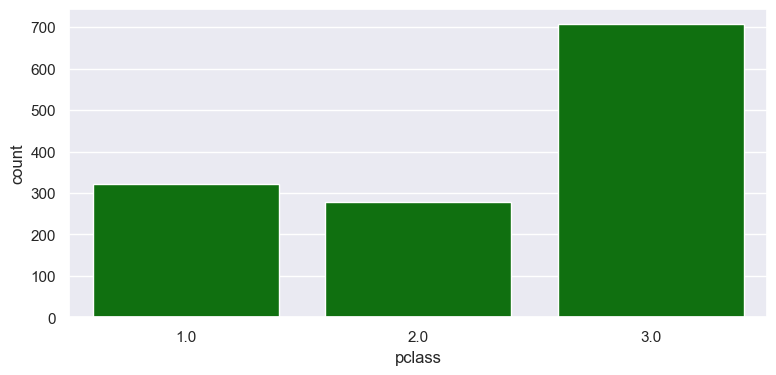

In [40]:
plt.figure(figsize=[9, 4])
sns.countplot(dataframe, x="pclass", color='green')

#### A lot of pasengers has traveling in pclass 3 after that pclass 2 and then pclass 1

In [41]:
filtered_data1 = dataframe.groupby(['survived', 'pclass']).size().reset_index(name='count')
filtered_data2 = dataframe.groupby(['survived', 'sex']).size().reset_index(name='count')
filtered_data3 = dataframe.groupby(['survived', 'surname']).size().reset_index(name='count')

##### Lets see is there a corelation between age and fare

<Axes: xlabel='age', ylabel='individual_fare'>

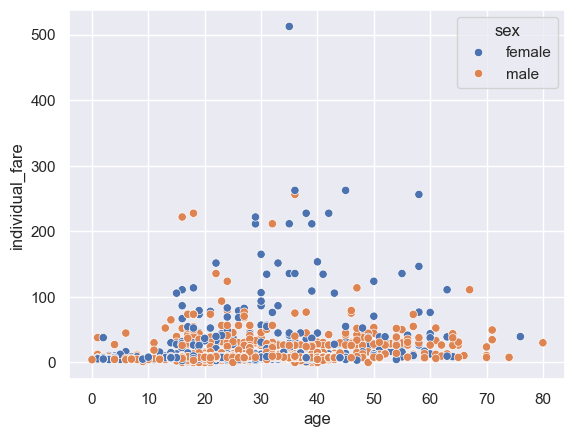

In [42]:
sns.scatterplot(x='age', y='individual_fare', hue='sex', data=dataframe)

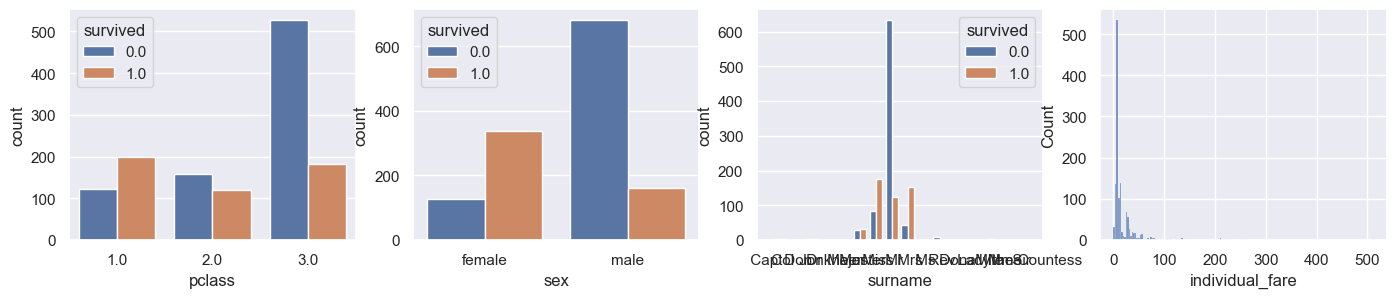

In [43]:
fig, ax = plt.subplots(1, 4, figsize=[17,3])

sns.barplot(x='pclass', y='count', hue='survived', data=filtered_data1, ax=ax[0])
sns.barplot(x='sex', y='count', hue='survived', data=filtered_data2, ax=ax[1])
sns.barplot(x='surname', y='count', hue='survived', data=filtered_data3, ax=ax[2])
sns.histplot(x='individual_fare', data=dataframe, ax=ax[3])
plt.show()

#### As per this chart we can see that survival depends on pclass and sex

### now lets drop unnessecory columns and calculate  correlation between target column and feature column

In [44]:
dataframe.sample()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_category,total_family,family_size,family_title,surname,individual_fare,Deck
135,1.0,0.0,"Goldschmidt, Mr. George B",male,71,0.0,0.0,PC 17754,34.65,A5,C,old,1.0,Single,Goldschmidt,Mr,34.65,A


In [45]:
dataframe.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'age_category', 'total_family',
       'family_size', 'family_title', 'surname', 'individual_fare', 'Deck'],
      dtype='object')

In [75]:
new_dataframe = dataframe.drop(columns=['name', 'age', 'sibsp', 'parch', 'ticket', 'total_family', 'fare', 'family_title', 'surname', 'cabin']).reset_index()

In [76]:
new_dataframe.sample(3)

,index,pclass,survived,sex,embarked,age_category,family_size,individual_fare,Deck
491,493,2.0,0.0,male,C,semi-old,Small,12.33,N
1130,1132,3.0,0.0,male,S,semi-old,Single,7.90,N
215,216,1.0,1.0,female,S,youngster,Small,8.76,D


In [77]:
new_dataframe.Deck.unique()

array(['B', 'C', 'E', 'D', 'A', 'N', 'T', 'F', 'G'], dtype=object)

1. Boat Deck (A Deck):

    - The highest deck on the Titanic.

    - Featured the ship's lifeboats and some of the ship's premium accommodations, including the Captain's quarters.


2. Promenade Deck (B Deck):

    - Promenade space for passengers to enjoy the sea view.

    - Some first-class cabins and suites.

3. Bridge Deck (C Deck):

    - Included more first-class cabins and suites.

    - The bridge, where the ship was navigated, was located on this deck.

4. Shelter Deck (D Deck):

    - Additional first-class cabins.

    - Some second-class cabins.

    - Turkish Baths, swimming pool, and other amenities.

5. Saloon Deck (E Deck):

    - The main dining room (à la carte restaurant) was situated here.

    - More first-class and second-class cabins.

    - The Grand Staircase began on this deck.

6. Upper Deck (F Deck):

    - A mix of first-class, second-class, and third-class cabins.

    - Some public spaces and facilities.

7. Middle Deck (G Deck):

    - Predominantly third-class cabins.

    - Some public spaces and facilities.


![Alt text](Titanic-Deck-Plan.jpg)

In [78]:
deck = new_dataframe.groupby(['survived', 'Deck']).size().reset_index(name='count')
deck

,survived,Deck,count
0,0.0,A,11
1,0.0,B,18
2,0.0,C,37
3,0.0,D,14
4,0.0,E,11
5,0.0,F,8
6,0.0,G,2
7,0.0,N,706
8,0.0,T,1
9,1.0,A,11


In [79]:
deck = deck[~(deck.Deck == 'N')]

<Axes: xlabel='Deck', ylabel='count'>

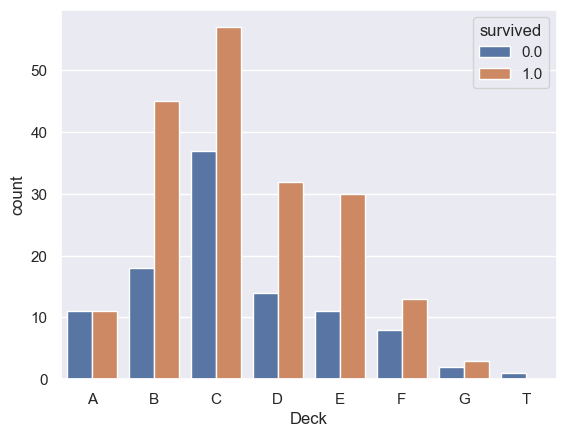

In [80]:
sns.barplot(x='Deck', y='count', hue='survived', data=deck)

### As per this finding i observed that Deck B, C, D & E deck are safest

In [81]:
new_dataframe[new_dataframe.Deck == 'T']

,index,pclass,survived,sex,embarked,age_category,family_size,individual_fare,Deck
30,30,1.0,0.0,male,S,semi-old,Single,35.5,T


##### Note that N is the value in Deck columns that is equals to Not Assign

In [82]:
new_dataframe.sample(3)

,index,pclass,survived,sex,embarked,age_category,family_size,individual_fare,Deck
474,476,2.0,0.0,male,S,youngster,Small,8.67,N
1095,1097,3.0,0.0,male,S,children,Medium,4.22,N
438,440,2.0,1.0,female,S,semi-old,Medium,16.25,N


### Now our data is ready to use lets preprocess the dataframe

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [85]:
oh = ohe.fit_transform(new_dataframe[['sex', 'embarked', 'age_category', 'family_size', 'Deck']])

c:\Users\Saif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
feature_names = ohe.get_feature_names_out(['sex', 'embarked', 'age_category', 'family_size', 'Deck'])

In [87]:
df_encoded = pd.DataFrame(oh, columns=feature_names)

In [88]:
df_encoded.tail(7)

,sex_male,embarked_Q,embarked_S,age_category_old,age_category_semi-old,age_category_youngster,family_size_Medium,family_size_Single,family_size_Small,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
1299,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1300,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1302,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1303,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1304,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1305,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
new_dataframe.reset_index()

,level_0,index,pclass,survived,sex,embarked,age_category,family_size,individual_fare,Deck
0,0,0,1.0,1.0,female,S,youngster,Single,211.34,B
1,1,1,1.0,1.0,male,S,children,Medium,37.89,C
2,2,2,1.0,0.0,female,S,children,Medium,37.89,C
3,3,3,1.0,0.0,male,S,youngster,Medium,37.89,C
4,4,4,1.0,0.0,female,S,youngster,Medium,37.89,C
...,...,...,...,...,...,...,...,...,...,...
1301,1301,1304,3.0,0.0,female,C,children,Small,7.22,N
1302,1302,1305,3.0,0.0,female,C,semi-old,Small,7.22,N
1303,1303,1306,3.0,0.0,male,C,youngster,Single,7.22,N
1304,1304,1307,3.0,0.0,male,C,youngster,Single,7.22,N


In [92]:
new_dataframe = pd.concat([new_dataframe, df_encoded], axis=1)

In [95]:
new_dataframe = new_dataframe.drop('index', axis=1)

In [98]:
new_dataframe.drop(columns=['sex', 'embarked', 'age_category', 'family_size', 'Deck'], axis=1, inplace=True)

In [117]:
new_dataframe[['pclass', 'survived', 'sex_male', 'embarked_Q',
       'embarked_S', 'age_category_old', 'age_category_semi-old',
       'age_category_youngster', 'family_size_Medium', 'family_size_Single',
       'family_size_Small', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_N', 'Deck_T']] = new_dataframe[['pclass', 'survived', 'sex_male', 'embarked_Q',
       'embarked_S', 'age_category_old', 'age_category_semi-old',
       'age_category_youngster', 'family_size_Medium', 'family_size_Single',
       'family_size_Small', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_N', 'Deck_T']].astype('int')

In [120]:
new_dataframe.sample(6)

,pclass,survived,individual_fare,sex_male,embarked_Q,embarked_S,age_category_old,age_category_semi-old,age_category_youngster,family_size_Medium,family_size_Single,family_size_Small,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
246,1,1,29.70,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
264,1,1,35.50,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
15,1,0,25.92,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
332,2,0,10.50,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
941,3,0,9.59,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
487,2,1,13.00,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [121]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pclass                  1306 non-null   int32  
 1   survived                1306 non-null   int32  
 2   individual_fare         1306 non-null   float64
 3   sex_male                1306 non-null   int32  
 4   embarked_Q              1306 non-null   int32  
 5   embarked_S              1306 non-null   int32  
 6   age_category_old        1306 non-null   int32  
 7   age_category_semi-old   1306 non-null   int32  
 8   age_category_youngster  1306 non-null   int32  
 9   family_size_Medium      1306 non-null   int32  
 10  family_size_Single      1306 non-null   int32  
 11  family_size_Small       1306 non-null   int32  
 12  Deck_B                  1306 non-null   int32  
 13  Deck_C                  1306 non-null   int32  
 14  Deck_D                  1306 non-null   

### Now lets train our model

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X = new_dataframe.drop('survived', axis=1)
y = new_dataframe.survived

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [127]:
X_train.shape, X_test.shape

((914, 19), (392, 19))

In [149]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [150]:
lr_model = LogisticRegression()
rfc = RandomForestClassifier()
sgd_model = SGDClassifier()
svc_model = SVC()
dtc_model = DecisionTreeClassifier()
knc_model = KNeighborsClassifier()
lin_svc_model = LinearSVC()

In [151]:
lr_model.fit(X_train, y_train)
rfc.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
dtc_model.fit(X_train, y_train)
knc_model.fit(X_train, y_train)
lin_svc_model.fit(X_train, y_train)

c:\Users\Saif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Saif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Saif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

LinearSVC()

In [152]:
lr_pred = lr_model.predict(X_test)
rfc_pred = rfc.predict(X_test)
sgd_pred = sgd_model.predict(X_test)
svc_pred = svc_model.predict(X_test)
dtc_pred = dtc_model.predict(X_test)
knc_pred = knc_model.predict(X_test)
lin_svc_pred = lin_svc_model.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score

In [154]:
print(f"LogisticRegression: {round(accuracy_score(y_true=y_test, y_pred=lr_pred) * 100, 2)}%")
print(f"RandomForestClassifier: {round(accuracy_score(y_true=y_test, y_pred=rfc_pred) * 100, 2)}%")
print(f"SGDClassifier: {round(accuracy_score(y_true=y_test, y_pred=sgd_pred) * 100, 2)}%")
print(f"SVC: {round(accuracy_score(y_true=y_test, y_pred=svc_pred) * 100, 2)}%")
print(f"DecisionTreeClassifier: {round(accuracy_score(y_true=y_test, y_pred=dtc_pred) * 100, 2)}%")
print(f"KNeighborsClassifier: {round(accuracy_score(y_true=y_test, y_pred=knc_pred) * 100, 2)}%")
print(f"KNeighborsClassifier: {round(accuracy_score(y_true=y_test, y_pred=lin_svc_pred) * 100, 2)}%")

LogisticRegression: 78.57%
RandomForestClassifier: 78.06%
SGDClassifier: 70.92%
SVC: 63.27%
DecisionTreeClassifier: 77.81%
KNeighborsClassifier: 72.45%
KNeighborsClassifier: 76.79%
